In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
import pandas as pd
import cufflinks as cf
import plotly.offline as plyo

In [31]:
import os
import random
import numpy as np
import pandas as pd
from pylab import mpl, plt
import pandas_datareader.data as web
data = web.DataReader('IOC.NS', 'yahoo', '2016-01-01','2022-09-30')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1659 entries, 2016-01-01 to 2022-09-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1659 non-null   float64
 1   Low        1659 non-null   float64
 2   Open       1659 non-null   float64
 3   Close      1659 non-null   float64
 4   Volume     1659 non-null   float64
 5   Adj Close  1659 non-null   float64
dtypes: float64(6)
memory usage: 90.7 KB


In [33]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-01,72.449997,71.333336,71.349998,72.208336,3754404.0,44.905445
2016-01-04,72.208336,70.333336,72.166664,71.074997,6017748.0,44.200634
2016-01-05,74.333336,71.083336,71.308334,73.775002,7926444.0,45.879730
2016-01-06,76.000000,73.500000,74.150002,75.141663,14527062.0,46.729645
2016-01-07,75.391663,72.550003,74.066666,73.591667,13516104.0,45.765724


In [5]:
# data.plot(figsize=(10,6))

In [34]:
data.describe().round(2)

,High,Low,Open,Close,Volume,Adj Close
count,1659.00,1659.00,1659.00,1659.00,1.659000e+03,1659.00
mean,91.68,89.16,90.53,90.32,1.989063e+07,67.69
std,25.96,25.32,25.69,25.60,1.770081e+07,15.71
min,48.93,47.43,48.23,47.70,8.870550e+05,37.78
25%,71.07,69.45,70.34,70.32,1.010758e+07,56.04
50%,87.07,84.40,85.77,85.77,1.512313e+07,68.87
75%,108.42,105.38,107.27,107.06,2.368620e+07,78.68
max,154.32,149.35,152.83,151.57,3.148937e+08,101.96


In [35]:
# data.mean().round(2)

In [36]:
# data.diff().tail()

In [37]:
# data.pct_change().round(2).tail()

In [38]:
# data.pct_change().mean().plot(kind='bar', figsize=(10,6))

In [40]:
rets = np.log(data/data.shift(1))



In [41]:
# rets.cumsum().apply(np.exp).plot(figsize=(10,6));

In [42]:
# data.resample('1w', label='right').last().head()

In [43]:
# rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(10,6))

## Rolling Statistics

In [44]:
# data

In [45]:

window = 20
data['min'] = data['Close'].rolling(window=window).min()
data['mean'] = data['Close'].rolling(window=window).mean()
data['std'] = data['Close'].rolling(window= window).std()
data['median'] = data['Close'].rolling(window=window).median()
data['max'] = data['Close'].rolling(window=window).max()
data['ewma'] = data['Close'].ewm(halflife=0.5, min_periods=window).mean()

In [46]:
# data

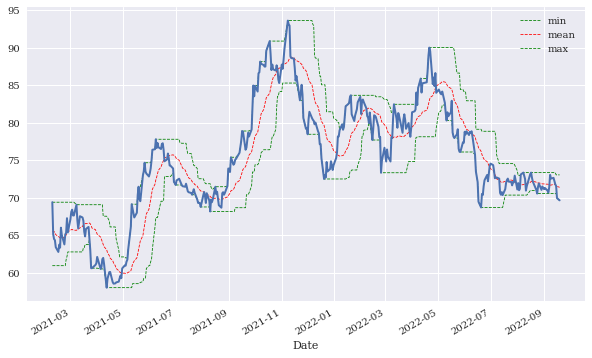

In [57]:
ax = data[['min','mean','max',]].iloc[-400:].plot(
figsize=(10,6),
style=['g--','r--','g--'],lw=0.8)
data['Close'].iloc[-400:].plot(ax=ax, lw=2.0);

In [48]:
data['SMA1'] = data['Close'].rolling(window=42).mean()
data['SMA2'] = data['Close'].rolling(window=252).mean()

In [49]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,min,mean,std,median,max,ewma,SMA1,SMA2
Date,,,,,,,,,,,,,,
2022-09-13,73.099998,72.000000,73.050003,72.250000,11555561.0,72.250000,70.550003,71.805001,0.859758,71.474998,73.349998,72.344515,71.794048,78.984391
2022-09-14,72.250000,71.599998,71.949997,71.800003,9024753.0,71.800003,70.550003,71.737501,0.799486,71.474998,73.349998,71.936131,71.827381,78.971428
2022-09-15,72.199997,71.300003,72.000000,71.550003,9985561.0,71.550003,70.550003,71.647501,0.704026,71.474998,73.050003,71.646535,71.846429,78.956944
2022-09-16,71.699997,69.500000,71.550003,69.949997,25993505.0,69.949997,69.949997,71.512501,0.758440,71.424999,73.050003,70.374131,71.836905,78.932936
2022-09-19,70.400002,69.599998,70.250000,69.650002,13589862.0,69.650002,69.650002,71.387501,0.848510,71.350002,73.050003,69.831034,71.801191,78.904431


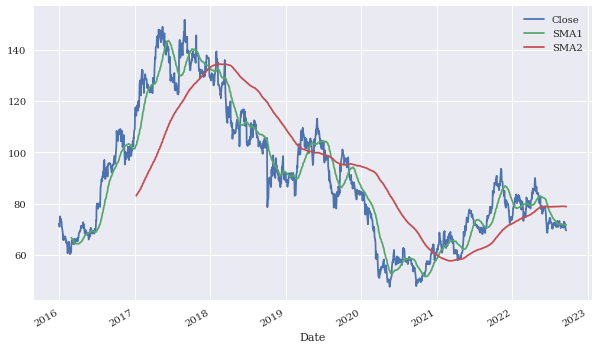

In [50]:
data[['Close','SMA1','SMA2']].plot(figsize=(10,6));

In [51]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'],1, -1
                           )

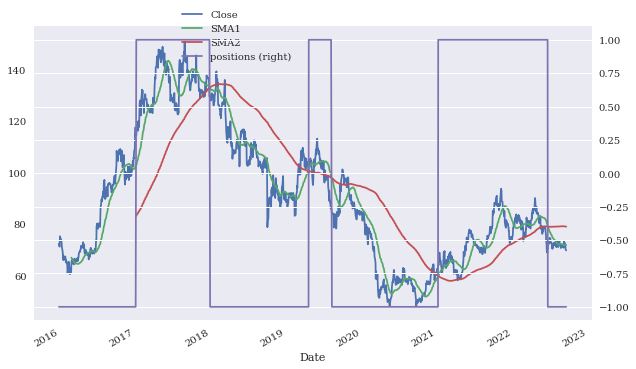

In [52]:
ax = data[['Close', 'SMA1','SMA2','positions']].plot(figsize=(10,6), secondary_y = 'positions')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

In [53]:
qf=cf.QuantFig(data, 
              title='Wipro',
              legend = 'top',
              name='Stock')

In [55]:
# qf.add_bollinger_bands(periods=15, boll_std=2)
qf.add_ema(periods=29)
qf.add_ema(periods=242)
qf.add_rsi(periods=12, showbands=True)

In [56]:
plyo.iplot(
    qf.iplot(asFigure=True))